Introduction:

Based on the dataset and the task assigned, the consultancy organization has hired me to analyze the
data and find the best way to increase support for ranked choice voting in the United States.  The dataset contains 12 columns, encompassing variables such as gender, age, race, education, political leanings, affiliation, and individuals' approval of ranked choice voting. With a sizeable sample of 800 rows, each representing a unique individual with distinct characteristics, the dataset provides a rich source for meaningful insights.

Upon delving into the data, it's evident that the average age of the respondents is 59.5 years. Gender-wise distribution reveals that 55% (446) identify as males, while 45% (354) identify as females. In terms of RCV support, 48% (386) voted affirmatively, 43% (345) opposed, and 8% (69) did not express a preference.

Further dissecting the data by gender, it emerges that 146 males voted in favor of RCV, 300 opposed it, while 235 females supported RCV, and 119 were against it, indicating a notable divergence between male and female perspectives. Among racial groups, 23 respondents identify as Asian, 91 as Black, 30 as unknown, 36 as Latino, 15 as other, and the majority, 605, as White. Analyzing RCV support within racial categories, White respondents lead with 43.3%, followed by Black (48.3%), Asian (47%), Latino (75%), and other (53%), spotlighting distinct patterns of support across diverse racial backgrounds.


Zooming in on education levels, the data reflects 15 respondents with unknown educational status, 218 with high school or less, 181 with some college, 227 with an undergraduate degree, and 159 with a graduate degree. Of that, 50% (111 participants) of high school or less support RCV(107 participants), 50.8%(92 participants) of some college support RCV,50.2%(114 participants) of college graduates support RCV, 39%(63 people) of graduate degree holders support RCV.


In [ ]:
#RCV 
#Counts the number of people that have voted for, or against RCV, with 1 being Yes, 2 being no, and 0 being other
def RCV_numeric(RCV_str):
    """
    Map RCV strings to numeric values.

    Parameters:
    - RCV_str (str): RCV string ("Yes" or "No").

    Returns:
    - int: Numeric representation (1 for Yes, 2 for No, 0 for other).
    """
    if RCV_str.lower() == "yes":
        return 1
    elif RCV_str.lower() == "no":
        return 2
    else:
        return 0

cah = Table.read_table("CAH_PulseoftheNation_FinalProject.csv")

RCV_column = "Ranked Choice"

cah = cah.with_column(RCV_column, cah.apply(RCV_numeric, RCV_column))

#cah.show(5)

RCV_stats = cah.group(RCV_column).stats()
RCV_stats

RCV_counts = cah.group(RCV_column).sort("Ranked Choice")
print("Counts of RCV Responses:")
print(RCV_counts)

Counts of RCV Responses:
Ranked Choice | count
0             | 69
1             | 386
2             | 345


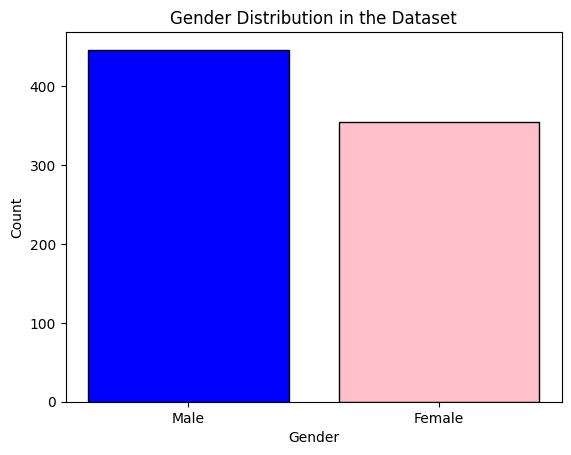

In [ ]:
#Gender
#Gender distribution for RCV, with 1 for males, and 2 for females.

def map_gender_to_numeric(gender_str):
    """
    Map gender strings to numeric values.

    Parameters:
    - gender_str (str): Gender string ("male" or "female").

    Returns:
    - int: Numeric representation (1 for male, 2 for female).
    """
    if gender_str.lower() == "male":
        return 1
    else:
        return 0  


cah = Table.read_table("CAH_PulseoftheNation_FinalProject.csv")
gender_column = "Gender"

cah = cah.with_column("Gender", cah.apply(map_gender_to_numeric, gender_column))
gender_stats = cah.group("Gender").stats()
gender_stats

gender_counts = cah.group("Gender").column("count")

plt.bar(["Male", "Female"], gender_counts, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in the Dataset')
plt.show()

In [ ]:
# OF RCV SUPPORTERS AND GENDER
#Counts the RCV supporters by gender, with 1 for males, 2 for females
def map_gender_to_numeric(gender_str):
    """
    Map gender strings to numeric values.

    Parameters:
    - gender_str (str): Gender string ("male" or "female").

    Returns:
    - int: Numeric representation (1 for male, 2 for female).
    """
    if gender_str.lower() == "male":
        return 1
    elif gender_str.lower() == "female":
        return 2
    else:
        return 0

def RCV_numeric(RCV_str):
    """
    Map RCV strings to numeric values.

    Parameters:
    - RCV_str (str): RCV string ("Yes" or "No").

    Returns:
    - int: Numeric representation (1 for Yes, 2 for No, 0 for other).
    """
    if RCV_str.lower() == "yes":
        return 1
    elif RCV_str.lower() == "no":
        return 2
    else:
        return 0

cah = Table.read_table("CAH_PulseoftheNation_FinalProject.csv")

gender_column = "Gender"
RCV_column = "Ranked Choice"

cah = cah.with_columns(
    "Gender_Numeric", cah.apply(map_gender_to_numeric, gender_column),
    "RCV_Numeric", cah.apply(RCV_numeric, RCV_column)
)

#cah.show(5)

men_support_rcv = cah.where("Gender_Numeric", are.equal_to(1)).where("RCV_Numeric", are.equal_to(1)).num_rows
women_support_rcv = cah.where("Gender_Numeric", are.equal_to(2)).where("RCV_Numeric", are.equal_to(1)).num_rows

# Display the results
print("Number of Men who Support RCV:", men_support_rcv)
print("Number of Women who Support RCV:", women_support_rcv)


Number of Men who Support RCV: 146
Number of Women who Support RCV: 235


In [ ]:
#RACE
#Counts the RCV supporters by race, with 1 for white, 2 for black, 3 for asian, 4 for latino, 5 for other races.

def race_numeric(race_str):
    """
    Map race strings to numeric values.

    Parameters:
    - race_str (str): race string ("White" , "Black", "Asian", "Latino":, "Other").

    Returns:
    - int: Numeric representation (1 for white, 2 for black, 3 for asian, 4 for latino, 5 for other).
    """
    if race_str.lower() == "white":
        return 1
    elif race_str.lower() == "black":
        return 2
    elif race_str.lower() == "asian":
        return 3
    elif race_str.lower() == "latino":
        return 4
    elif race_str.lower() == "other":
        return 5
    else:
        return 0

# Read the data
cah = Table.read_table("CAH_PulseoftheNation_FinalProject.csv")
race_column = "Race"

# Apply the race_numeric function to create a new column with numeric representations of race
cah = cah.with_column("Race_Numeric", cah.apply(race_numeric, race_column))

race_stats = cah.group(race_column).stats()
race_stats
race_counts = cah.group(race_column).sort("Race")
print("Counts of Race Responses:")
print(race_counts)

Counts of Race Responses:
Race   | count
Asian  | 23
Black  | 91
DK/REF | 30
Latino | 36
Other  | 15
White  | 605


In [ ]:
# OF RCV SUPPORTERS BY RACE
def RCV_numeric(RCV_str):
    """
    Map RCV strings to numeric values.

    Parameters:
    - RCV_str (str): RCV string ("Yes" or "No").

    Returns:
    - int: Numeric representation (1 for Yes, 2 for No, 0 for other).
    """
    if RCV_str.lower() == "yes":
        return 1
    elif RCV_str.lower() == "no":
        return 2
    else:
        return 0
    
    
def race_numeric(race_str):
    """
    Map race strings to numeric values.

    Parameters:
    - race_str (str): race string ("White" , "Black", "Asian", "Latino", "Other").

    Returns:
    - int: Numeric representation (1 for white, 2 for black, 3 for asian, 4 for latino, 5 for other).
    """
    if race_str.lower() == "white":
        return 1
    elif race_str.lower() == "black":
        return 2
    elif race_str.lower() == "asian":
        return 3
    elif race_str.lower() == "latino":
        return 4
    elif race_str.lower() == "other":
        return 5
    else:
        return 0
    
cah = Table.read_table("CAH_PulseoftheNation_FinalProject.csv")

RCV_column = "Ranked Choice"
race_column = "Race"

cah = cah.with_columns(
    "race_Numeric", cah.apply(race_numeric, race_column),
    "RCV_Numeric", cah.apply(RCV_numeric, RCV_column)
)
#cah.show(5)

white_support_rcv = cah.where("race_Numeric", are.equal_to(1)).where("RCV_Numeric", are.equal_to(1)).num_rows
black_support_rcv = cah.where("race_Numeric", are.equal_to(2)).where("RCV_Numeric", are.equal_to(1)).num_rows
asian_support_rcv = cah.where("race_Numeric", are.equal_to(3)).where("RCV_Numeric", are.equal_to(1)).num_rows
latino_support_rcv = cah.where("race_Numeric", are.equal_to(4)).where("RCV_Numeric", are.equal_to(1)).num_rows
other_support_rcv = cah.where("race_Numeric", are.equal_to(5)).where("RCV_Numeric", are.equal_to(1)).num_rows


print("Number of whites people who Support RCV:", white_support_rcv)
print("Number of black people who Support RCV:", black_support_rcv)
print("Number of asian people who Support RCV:", asian_support_rcv)
print("Number of latino people who Support RCV:", latino_support_rcv)
print("Number of other people who Support RCV:", other_support_rcv)


Number of whites people who Support RCV: 262
Number of black people who Support RCV: 62
Number of asian people who Support RCV: 11
Number of latino people who Support RCV: 27
Number of other people who Support RCV: 8


Counts of Education Levels:
Education_Numeric | count
0                 | 15
1                 | 218
2                 | 181
3                 | 227
4                 | 159
Number of high school or less people who Support RCV: 111
Number of some college people who Support RCV: 92
Number of college grad people who Support RCV: 114
Number of graduates people who Support RCV: 63


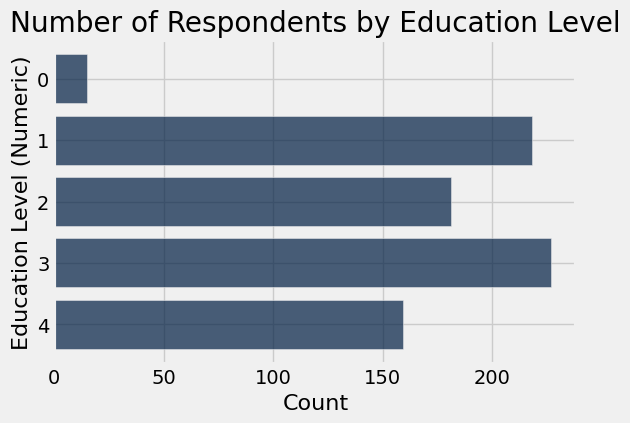

NameError: name 'rcv_by_education' is not defined

In [234]:
#EDUCATION LEVEL
#Figure 1
    
def RCV_numeric(RCV_str):
    if RCV_str.lower() == "yes":
        return 1
    elif RCV_str.lower() == "no":
        return 2
    else:
        return 0
    
def education_numeric(education_str):
    if education_str.lower() == "high school or less":
        return 1
    elif education_str.lower() == "some college":
        return 2
    elif education_str.lower() == "college degree":
        return 3
    elif education_str.lower() == "graduate degree":
        return 4
    else:
        return 0
    
education_column = "Education"

cah = cah.with_columns(
    "Education_Numeric", cah.apply(education_numeric, education_column)
)

# Display the updated table
#cah.show(5)

education_counts = cah.group("Education_Numeric").sort("Education_Numeric")

print("Counts of Education Levels:")
print(education_counts)
    
cah = Table.read_table("CAH_PulseoftheNation_FinalProject.csv")

RCV_column = "Ranked Choice"
race_column = "Race"
gender_column = "Gender"
education_column = "Education"
aff_column = "Political Affiliation"



cah = cah.with_columns(
    "Gender_Numeric", cah.apply(map_gender_to_numeric, gender_column),
    "RCV_Numeric", cah.apply(RCV_numeric, RCV_column),
    "Race_Numeric", cah.apply(race_numeric, race_column),
    "Education_Numeric", cah.apply(education_numeric, education_column),
    "AFF_Numeric", cah.apply(aff_numeric, aff_column)
)

#cah.show(5)


high_school_support_rcv = cah.where("Education_Numeric", are.equal_to(1)).where("RCV_Numeric", are.equal_to(1)).num_rows
some_college_support_rcv = cah.where("Education_Numeric", are.equal_to(2)).where("RCV_Numeric", are.equal_to(1)).num_rows
college_support_rcv = cah.where("Education_Numeric", are.equal_to(3)).where("RCV_Numeric", are.equal_to(1)).num_rows
graduate_support_rcv = cah.where("Education_Numeric", are.equal_to(4)).where("RCV_Numeric", are.equal_to(1)).num_rows



print("Number of high school or less people who Support RCV:", high_school_support_rcv)
print("Number of some college people who Support RCV:", some_college_support_rcv)
print("Number of college grad people who Support RCV:", college_support_rcv)
print("Number of graduates people who Support RCV:", graduate_support_rcv)



education_counts.barh('Education_Numeric', 'count')
plt.title('Number of Respondents by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level (Numeric)')
plt.show()


rcv_by_education.plot(kind='bar', stacked=True)
plt.title('RCV Support by Education Level')
plt.xlabel('Education Level (Numeric)')
plt.ylabel('Count')
plt.legend(['No', 'Yes', 'Other'], title='RCV Support')
plt.show()

Null Hypothesis: 

The null hypothesis (H0) posits a significant association between education level and RCV support, while the alternative hypothesis (H1) conjectures no such significant association. The code comprises several key components, each contributing to the overall analysis.

The initial step involves transforming categorical variables related to education and RCV support into numeric values, as strings are unable to be used to compute values.

The statistic function is crafted to calculate the absolute difference between expected and observed proportions of RCV support. The expected proportion (expected_prop) is set to 0.5, symbolizing an equal likelihood of either supporting or not supporting RCV. An observed proportion (actual_prop) of 0.22 is set to represent the observed support for RCV. The observed statistic is then computed using the statistic function, comparing expected and observed proportions. Simulated data is generated through repeated sampling from a model with an anticipated proportion of 0.5. The number of repetitions and sample size are explicitly defined, introducing an element of randomness to simulate various scenarios.

The simulation_and_statistic function assesses the expected proportion (0.5) against the simulated proportion of RCV support, offering a glimpse into the variability of the data under the null hypothesis. Simulated statistics are aggregated across multiple repetitions, constructing a distribution of statistics under the null hypothesis. This distribution provides a benchmark against which the observed statistic can be evaluated.

The final section involves a hypothesis test. The proportion of simulated statistics greater than or equal to the observed statistic is calculated. A predefined significance level (alpha) of 0.05 is employed to determine whether to reject or fail to reject the null hypothesis. If the proportion is below alpha, the null hypothesis is rejected, signifying a significant association between education level and RCV support. In this case, we reject the null, which states that There is a significant association between education level and support for RCV. While the alternative Hypothesis (H1) states that there is no significant association between education level and support for RCV.


Reject the null hypothesis. There is a significant association between education level and support for RCV.


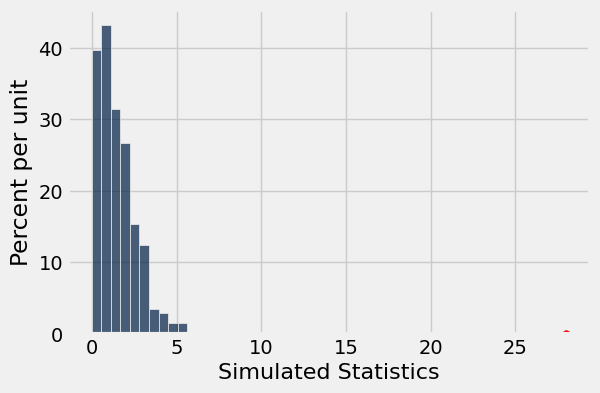

In [ ]:
# There is a significant association between education level and support for RCV.

#Alternative Hypothesis (H1):
#There is no significant association between education level and support for RCV.

education_column = "Education"
RCV_column = "Ranked Choice"

# Apply the mapping functions and create new columns
cah = cah.with_columns(
    "Education_Numeric", cah.apply(education_numeric, education_column),
    "RCV_Numeric", cah.apply(RCV_numeric, RCV_column)
)

expected_correct = 0.5 

def statistic(expected_prop, actual_prop):
    
    absolute_difference = abs(expected_prop - actual_prop)
    
    
    percentage_difference = absolute_difference * 100
    
    return percentage_difference

expected_prop = 0.5  
actual_prop = 0.22 

observed_statistic = statistic(expected_prop, actual_prop)


sample_proportions(100, make_array(0.2, 0.28))

model_proportions = make_array(0.5, 0.5)
simulation_proportion = sample_proportions(800, model_proportions)

one_statistic = statistic(model_proportions[0], simulation_proportion[0])

def simulation_and_statistic(num_guesses, model_proportions, expected_correct):
    
    simulation_proportion = sample_proportions(num_guesses, model_proportions)
    return statistic(expected_correct, simulation_proportion[0])

num_repetitions = 1000
num_guesses = 800
expected_correct = 0.5

simulated_statistics = make_array()

for _ in range(num_repetitions):
    one_statistic = simulation_and_statistic(num_guesses, model_proportions, expected_correct)
    simulated_statistics = np.append(simulated_statistics, one_statistic)

simulated_statistics

t = Table().with_column('Simulated Statistics', simulated_statistics)
t.hist()
plt.scatter(observed_statistic, 0, color='red', s=30);


proportion_greater_or_equal = np.count_nonzero(simulated_statistics >= observed_statistic) / len(simulated_statistics)
proportion_greater_or_equal

proportion_greater_or_equal = np.count_nonzero(simulated_statistics >= observed_statistic) / len(simulated_statistics)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if proportion_greater_or_equal < alpha:
    print("Reject the null hypothesis. There is a significant association between education level and support for RCV.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between education level and support for RCV.")




In [ ]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
plt.style.use('fivethirtyeight')

In [ ]:
cah = Table.read_table("CAH_PulseoftheNation_FinalProject.csv")

Predictor: 


I designated the "positive" case as individuals who fully support Ranked Choice Voting (RCV), represented by the category "2" in the numeric mapping. The goal was to build a machine learning model that predicts whether an individual supports RCV based on their education level. This binary classification task aimed to distinguish between those who fully support RCV (positive case) and those who either partially or do not support it (negative case)

Firstly, the categorical variables, including education and RCV support, were transformed into numeric representations to facilitate machine learning analysis. The dataset was then split into training and testing sets, and a k-Nearest Neighbors (k-NN) model with k=1 was created. The model's performance was assessed using accuracy and a detailed classification report, including precision, recall, and F1-score for each class. The identified final model was the k-NN model with k=1.

he machine learning model's accuracy is evaluated using the test set, revealing an accuracy of 0.47, or 47%. The classification report provides more detailed insights into the model's performance. Precision, recall, and F1-score are computed for each class (0, 1, 2) representing different levels of support for RCV.

The results suggest that the machine learning model, particularly in distinguishing between different levels of support for RCV, has room for improvement. The low accuracy and varied performance across classes indicate challenges in predicting support based solely on education level. Further refinement of the model, consideration of additional features, or the exploration of alternative machine learning algorithms could enhance predictive capabilities.

In [238]:
#Predictor

education_column = "Education"
RCV_column = "Ranked Choice"

cah = Table.read_table("CAH_PulseoftheNation_FinalProject.csv")

cah = cah.with_columns(
    "Education_Numeric", cah.apply(education_numeric, education_column),
    "RCV_Numeric", cah.apply(RCV_numeric, RCV_column)
)

predictors = cah.column("Education_Numeric").reshape(-1, 1)
outcome = cah.column("RCV_Numeric")

X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.20      0.01      0.03        67
           2       0.48      0.96      0.64        78

    accuracy                           0.48       160
   macro avg       0.23      0.33      0.22       160
weighted avg       0.32      0.47      0.33       160



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusion: 
    
Notably, 50% of those with high school or less education express support for RCV, compared to 50.8% for some college, 50.2% for college graduates, and 39% for graduate degree holders. A graphical representation of these findings(figure 2 highlighted below) visually underscores the disparities, assigning numeric values to education levels, with 0 denoting unknown education, 1 for high school or less, 2 for some college, 3 for college graduates, and 4 for graduate degrees.

In formulating a hypothesis, the analysis posits that individuals with higher education levels (college and graduate) are more likely to support RCV compared to those with lower levels or incomplete education (some college or less). This hypothesis sets the stage for further statistical scrutiny and hypothesis testing to glean deeper insights into the relationship between education levels and RCV support within the dataset. Based on the data, the advertisment company should target and educate males with higher education, as they generally oppose RCV voting. To do this, they may highlight the importance or benefits from ranked choice voting.

